![](Images/2023-01-03-23-34-13.png)

## We want to connect the points to N points with minimum cost
* D_i_j    = the Distance between point i and point j  => obtaining it from point locations
* L_i      = the connection between point i and point j is a binary variable exist or not
* U_i      = the city i has chosen for teleconference or not and it is a binary variable exist or not
* M        = Number of points
* Nc       = Number of teleconference cities

In [1]:
import pyomo.environ as pyo
import numpy as np
import matplotlib.pyplot as plt
import random

In [8]:
# initialize the model
model = pyo.AbstractModel()

# # initialize the parameters and the variables
model.M = pyo.Param(mutable=True, default=20)
model.Nc = pyo.Param(mutable=True, default= 3)
model.I = pyo.RangeSet(1, model.M)
model.J = pyo.Set(initialize=model.I)

## Initiate points randomly
def initval(model, i):
    return random.uniform(0.001,1)
model.x_loc = pyo.Param(model.I, within=pyo.NonNegativeReals, initialize=initval, mutable=True)
model.y_loc = pyo.Param(model.I, within=pyo.NonNegativeReals, initialize=initval, mutable=True)

def dis_rule(model, i, j):
    return pyo.sqrt((model.x_loc[i] - model.x_loc[j])**2 + (model.y_loc[i] - model.y_loc[j])**2)
model.D = pyo.Param(model.I, model.J, within=pyo.NonNegativeReals, initialize=dis_rule, mutable=True)

model.U = pyo.Var(model.I, within=pyo.Binary, initialize=1)
model.L = pyo.Var(model.I, model.J, within=pyo.Binary, initialize=1)


# # # Constraint Declarations
def con_1_rule(model, i):
    return sum(model.L[i,j] if i!=j else 0 for j in model.J) == 1
model.c1 = pyo.Constraint(model.I, rule = con_1_rule)

def con_2_rule(model, i, j):
    return model.L[i,j] <= model.U[i]  + model.U[j]
model.c2 = pyo.Constraint(model.I, model.J, rule=con_2_rule)

def con_3_rule(model):
    return sum(model.U[i] for i in model.I)  == model.Nc
model.c3 = pyo.Constraint(rule=con_3_rule)

def OF_rule(model):
    return np.sum(model.L[i,j] * model.D[i,j] for i in model.I for j in model.J)
model.OF = pyo.Objective(rule= OF_rule, sense=pyo.minimize)

# Define the solver
solver = pyo.SolverFactory('glpk')
instance = model.create_instance()
results = solver.solve(instance)

# write the results
results.write()

    mutable Param).  The linkage between this RangeSet and the original source
    data will be broken, so updating the data value in the future will not be
    reflected in this RangeSet.  To suppress this warning, explicitly convert
    the source data to a constant type (e.g., float, int, or immutable Param)


C:\Users\20100\AppData\Local\Temp\ipykernel_15216\1477092181.py:38: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(model.L[i,j] * model.D[i,j] for i in model.I for j in model.J)


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 3.62293998402108
  Upper bound: 3.62293998402108
  Number of objectives: 1
  Number of constraints: 422
  Number of variables: 421
  Number of nonzeros: 1581
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 37
      Number of created subproblems: 37
  Error rc: 0
  Time: 0.2070012092590332
# ----------------------------------------------------------
#   Solution Information
# -------

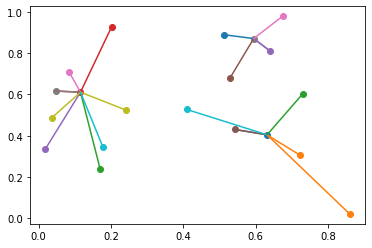

In [15]:
for i in instance.I:
    plt.scatter(pyo.value(instance.x_loc[i]), pyo.value(instance.y_loc[i]))
    for j in  instance.J:
        if i != j:
            if pyo.value(instance.L[i, j])== 1:
                plt.plot( [ pyo.value(instance.x_loc[i]), pyo.value(instance.x_loc[j]) ], [ pyo.value(instance.y_loc[i]), pyo.value(instance.y_loc[j]) ])


In [16]:
instance.pprint()

4 Set Declarations
    D_index : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain : Size : Members
        None :     2 :    I*J :  400 : {(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (2, 20), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (3, 20), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (4, 20), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (5, 16), (5, 17), (5, 18), (5, 19), (